In [9]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2 as cv
import matplotlib.pyplot as plt

In [10]:
# import wget
# url = "https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task"
# filename = wget.download(url)

In [11]:
# filename

'hand_landmarker (18).task'

## Visualization utilities

In [12]:
#@markdown We implemented some functions to visualize the hand landmark detection results. <br/> Run the following cell to activate the functions.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import math

MARGIN = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
HANDEDNESS_TEXT_COLOR = (88, 205, 54) # vibrant green

def get_distance_from_zero(point_a, point_b):
  distance = math.sqrt((point_a.x - point_b.x)**2 + (point_a.y - point_b.y)**2 + (point_a.z - point_b.z)**2)  # Euclidean distance formula
  print(f"Distancia desde el punto 0: {distance}")
  return distance


def draw_landmarks_on_image(rgb_image, detection_result):
  hand_landmarks_list = detection_result.hand_landmarks
  handedness_list = detection_result.handedness
  annotated_image = np.copy(rgb_image)
  points = []


  # Loop through the detected hands to visualize.
  for idx in range(len(hand_landmarks_list)):
    hand_landmarks = hand_landmarks_list[idx]
    handedness = handedness_list[idx]

    # Draw the hand landmarks.
    hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    hand_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
    ])

    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      hand_landmarks_proto,
      solutions.hands.HAND_CONNECTIONS,
      solutions.drawing_styles.get_default_hand_landmarks_style(),
      solutions.drawing_styles.get_default_hand_connections_style())

    # Get the top left corner of the detected hand's bounding box.
    height, width, _ = annotated_image.shape
    x_coordinates = [landmark.x for landmark in hand_landmarks]
    y_coordinates = [landmark.y for landmark in hand_landmarks]
    text_x = int(min(x_coordinates) * width)
    text_y = int(min(y_coordinates) * height) - MARGIN

    # Draw handedness (left or right hand) on the image.
    # cv.putText(annotated_image, f"{handedness[0].category_name}",
                # (text_x, text_y), cv.FONT_HERSHEY_DUPLEX,
                # FONT_SIZE, HANDEDNESS_TEXT_COLOR, FONT_THICKNESS, cv.LINE_AA)
    
    # Solo va a analizar una mano al coger solo la mano 0
    for i in range(1):
      punto_0 = hand_landmarks_list[i][0]
      dist_6 = get_distance_from_zero(hand_landmarks_list[i][6],punto_0)
      dist_8 = get_distance_from_zero(hand_landmarks_list[i][8],punto_0)
      dist_10 = get_distance_from_zero(hand_landmarks_list[i][10],punto_0)
      dist_12 = get_distance_from_zero(hand_landmarks_list[i][12],punto_0)
      dist_14 = get_distance_from_zero(hand_landmarks_list[i][14],punto_0)
      dist_16 = get_distance_from_zero(hand_landmarks_list[i][16],punto_0)
      dist_18 = get_distance_from_zero(hand_landmarks_list[i][18],punto_0)
      dist_20 = get_distance_from_zero(hand_landmarks_list[i][20],punto_0)

      gesto = ""
      if dist_6 > dist_8 and dist_14 > dist_16: gesto="Piedra"
      elif dist_6 < dist_8 and dist_10 < dist_12 and dist_14 > dist_16: gesto="Tijera"
      elif dist_6 < dist_8 and dist_10 < dist_12 and dist_14 < dist_16: gesto="Papel"

      cv.putText(annotated_image, gesto, (text_x, text_y), cv.FONT_HERSHEY_TRIPLEX,
                FONT_SIZE, HANDEDNESS_TEXT_COLOR, FONT_THICKNESS, cv.LINE_AA)

  return annotated_image

## Load test image

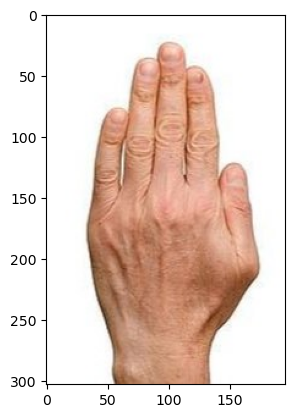

In [13]:
foto = cv.imread("C:\\Users\\daniel.martinezcarre\\Desktop\\Repositorios\\ia_repositorio\\Programacion de IA\\tirmestre_2\\imagenes\\papel.jpg")
img = cv.cvtColor(foto, cv.COLOR_BGR2RGB)
plt.imshow(img)

Distancia desde el punto 0: 0.589518777806622
Distancia desde el punto 0: 0.759729842304144
Distancia desde el punto 0: 0.5875629198402922
Distancia desde el punto 0: 0.8169724314136573
Distancia desde el punto 0: 0.5628179237740472
Distancia desde el punto 0: 0.7644848498814061
Distancia desde el punto 0: 0.5320933349224259
Distancia desde el punto 0: 0.6504114957729058


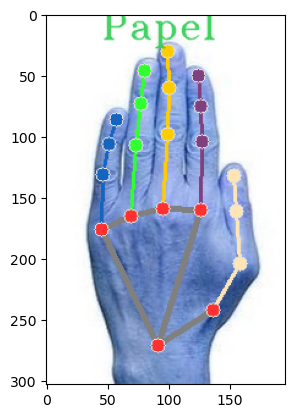

In [14]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an HandLandmarker object.
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("C:\\Users\\daniel.martinezcarre\\Desktop\\Repositorios\\ia_repositorio\\Programacion de IA\\tirmestre_2\\imagenes\\papel.jpg")

# STEP 4: Detect hand landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the classification result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
plt.imshow(cv.cvtColor(annotated_image, cv.COLOR_RGB2BGR))

In [15]:
import mediapipe as mp

path_modelo = "C:\\Users\\daniel.martinezcarre\\Desktop\\Clase\\modelos_descargados\\hand_landmarker.task"

BaseOptions = mp.tasks.BaseOptions
HandLandmarker = mp.tasks.vision.HandLandmarker
HandLandmarkerOptions = mp.tasks.vision.HandLandmarkerOptions
HandLandmarkerResult = mp.tasks.vision.HandLandmarkerResult
VisionRunningMode = mp.tasks.vision.RunningMode

# Create a hand landmarker instance with the live stream mode:
def print_result(result: HandLandmarkerResult, output_image: mp.Image, timestamp_ms: int):
    print('hand landmarker result: {}'.format(result))

options = HandLandmarkerOptions(
    base_options=BaseOptions(model_asset_path=path_modelo),
    running_mode=VisionRunningMode.VIDEO,
    num_hands=2)


In [16]:
import time
import math

#@markdown We implemented some functions to visualize the hand landmark detection results. <br/> Run the following cell to activate the functions.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import math
import mediapipe as mp

MARGIN = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
HANDEDNESS_TEXT_COLOR = (88, 205, 54) # vibrant green

def get_distance_from_zero(point_a, point_b):
  distance = math.sqrt((point_a.x - point_b.x)**2 + (point_a.y - point_b.y)**2 + (point_a.z - point_b.z)**2)  # Euclidean distance formula
  print(f"Distancia desde el punto 0: {distance}")
  return distance


def draw_landmarks_on_image(rgb_image, detection_result):
  hand_landmarks_list = detection_result.hand_landmarks
  handedness_list = detection_result.handedness
  annotated_image = np.copy(rgb_image)
  points = []


  # Loop through the detected hands to visualize.
  for idx in range(len(hand_landmarks_list)):
    hand_landmarks = hand_landmarks_list[idx]
    handedness = handedness_list[idx]

    # Draw the hand landmarks.
    hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    hand_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
    ])

    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      hand_landmarks_proto,
      solutions.hands.HAND_CONNECTIONS,
      solutions.drawing_styles.get_default_hand_landmarks_style(),
      solutions.drawing_styles.get_default_hand_connections_style())

    # Get the top left corner of the detected hand's bounding box.
    height, width, _ = annotated_image.shape
    x_coordinates = [landmark.x for landmark in hand_landmarks]
    y_coordinates = [landmark.y for landmark in hand_landmarks]
    text_x = int(min(x_coordinates) * width)
    text_y = int(min(y_coordinates) * height) - MARGIN

    # Draw handedness (left or right hand) on the image.
    # cv.putText(annotated_image, f"{handedness[0].category_name}",
                # (text_x, text_y), cv.FONT_HERSHEY_DUPLEX,
                # FONT_SIZE, HANDEDNESS_TEXT_COLOR, FONT_THICKNESS, cv.LINE_AA)
    
    # Solo va a analizar una mano al coger solo la mano 0
    for i in range(1):
      punto_0 = hand_landmarks_list[i][0]
      dist_6 = get_distance_from_zero(hand_landmarks_list[i][6],punto_0)
      dist_8 = get_distance_from_zero(hand_landmarks_list[i][8],punto_0)
      dist_10 = get_distance_from_zero(hand_landmarks_list[i][10],punto_0)
      dist_12 = get_distance_from_zero(hand_landmarks_list[i][12],punto_0)
      dist_14 = get_distance_from_zero(hand_landmarks_list[i][14],punto_0)
      dist_16 = get_distance_from_zero(hand_landmarks_list[i][16],punto_0)
      dist_18 = get_distance_from_zero(hand_landmarks_list[i][18],punto_0)
      dist_20 = get_distance_from_zero(hand_landmarks_list[i][20],punto_0)

      gesto = ""
      if dist_6 > dist_8 and dist_14 > dist_16: gesto="Piedra"
      elif dist_6 < dist_8 and dist_10 < dist_12 and dist_14 > dist_16: gesto="Tijera"
      elif dist_6 < dist_8 and dist_10 < dist_12 and dist_14 < dist_16: gesto="Papel"

      cv.putText(annotated_image, gesto, (text_x, text_y), cv.FONT_HERSHEY_TRIPLEX,
                FONT_SIZE, HANDEDNESS_TEXT_COLOR, FONT_THICKNESS, cv.LINE_AA)

  return annotated_image



path_modelo = "C:\\Users\\daniel.martinezcarre\\Desktop\\Clase\\modelos_descargados\\hand_landmarker.task"

BaseOptions = mp.tasks.BaseOptions
HandLandmarker = mp.tasks.vision.HandLandmarker
HandLandmarkerOptions = mp.tasks.vision.HandLandmarkerOptions
HandLandmarkerResult = mp.tasks.vision.HandLandmarkerResult
VisionRunningMode = mp.tasks.vision.RunningMode

# Create a hand landmarker instance with the live stream mode:
def print_result(result: HandLandmarkerResult, output_image: mp.Image, timestamp_ms: int):
    print('hand landmarker result: {}'.format(result))

options = HandLandmarkerOptions(
    base_options=BaseOptions(model_asset_path=path_modelo),
    running_mode=VisionRunningMode.VIDEO,
    num_hands=2)


# Definimos el índice de la cámara (0 para la cámara web predeterminada)
camara_indice = 0

# Capturamos la cámara
cap = cv.VideoCapture(camara_indice)

# Verificamos si la cámara se abrió correctamente
if not cap.isOpened():
    print("Error al abrir la cámara")
    exit()

with HandLandmarker.create_from_options(options) as landmarker:
    timestamp_inicial = time.time()
    # Bucle para leer y mostrar frames
    while True:

        # Leemos un frame
        ret, frame = cap.read()

        # Si no se pudo leer el frame, salimos del bucle
        if not ret:
            print("Error al leer el frame")
            break

        # Mostramos el frame en una ventana
        cv.imshow("Video en vivo", frame)


        # PREPARE DATA: Convert the frame received from OpenCV to a MediaPipe’s Image object.
        mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame)


        frame_timestamp_ms = round((time.time() - timestamp_inicial) * 1000)
        
        # RUN THE TASK: The hand landmarker must be created with the live stream mode.
        landmaker_detection = landmarker.detect_for_video(mp_image, frame_timestamp_ms)

        # STEP 5: Process the classification result. In this case, visualize it.
        annotated_image = draw_landmarks_on_image(mp_image.numpy_view(), landmaker_detection)
        cv.imshow("Detección de manos",annotated_image)

        # Salimos del bucle si se presiona la tecla "q"
        if cv.waitKey(1) & 0xFF == ord("q"):
            break

    # Liberamos la cámara
    cap.release()

    # Cerramos todas las ventanas
    cv.destroyAllWindows()


Distancia desde el punto 0: 0.11428673164698819
Distancia desde el punto 0: 0.08249525858172499
Distancia desde el punto 0: 0.11001351835800785
Distancia desde el punto 0: 0.07332692834693676
Distancia desde el punto 0: 0.10288945514609299
Distancia desde el punto 0: 0.0633346520891193
Distancia desde el punto 0: 0.09480869388417276
Distancia desde el punto 0: 0.0659894870686164
Distancia desde el punto 0: 0.11163331241615848
Distancia desde el punto 0: 0.07998226513930472
Distancia desde el punto 0: 0.10735577737094551
Distancia desde el punto 0: 0.07138609818178454
Distancia desde el punto 0: 0.10001349155448924
Distancia desde el punto 0: 0.059632625463301094
Distancia desde el punto 0: 0.09314918490402704
Distancia desde el punto 0: 0.06206607785384011
Distancia desde el punto 0: 0.11084999152485943
Distancia desde el punto 0: 0.07985149665931916
Distancia desde el punto 0: 0.10526970972935067
Distancia desde el punto 0: 0.0693213219975107
Distancia desde el punto 0: 0.098530051174